# Linear Regression
### Goal
Analyse the lineare regression between two features: CO2 Emmission and engine size 

## Data Collection

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

In our case, Data dont need a preparation

In [98]:
import pandas as pd

df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration
first have a descriptive exploration on our data.

In [99]:
#select features to explore more.
cdf = df[['ENGINESIZE','CO2EMISSIONS']]
cdf.head(9)


,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
5,3.5,230
6,3.5,232
7,3.7,255
8,3.7,267


In [100]:
# summarize the data
cdf.describe()

,ENGINESIZE,CO2EMISSIONS
count,1067.000000,1067.000000
mean,3.346298,256.228679
std,1.415895,63.372304
min,1.000000,108.000000
25%,2.000000,207.000000
50%,3.400000,251.000000
75%,4.300000,294.000000
max,8.400000,488.000000


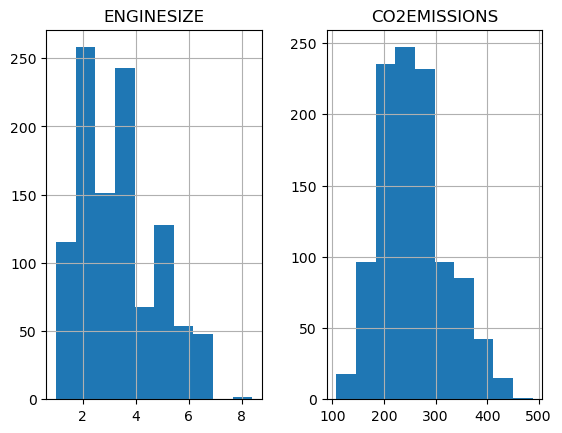

In [101]:
import matplotlib.pyplot as plt
# create an histogram for each feature
viz = cdf[['ENGINESIZE','CO2EMISSIONS']]
viz.hist()
plt.show()

Now, let's plot ENGINESIZE against the Emission, to see how linear their relationship is:


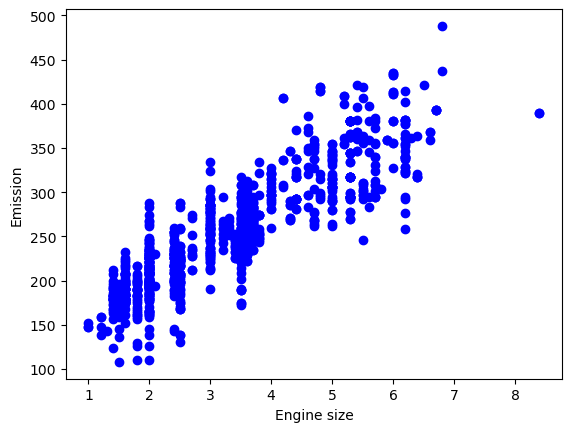

In [102]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Creating train and test dataset

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing.

In [103]:
from sklearn.model_selection import train_test_split

X = cdf[['ENGINESIZE']]
Y = cdf[['CO2EMISSIONS']]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

## Regression Model

### Train data distribution

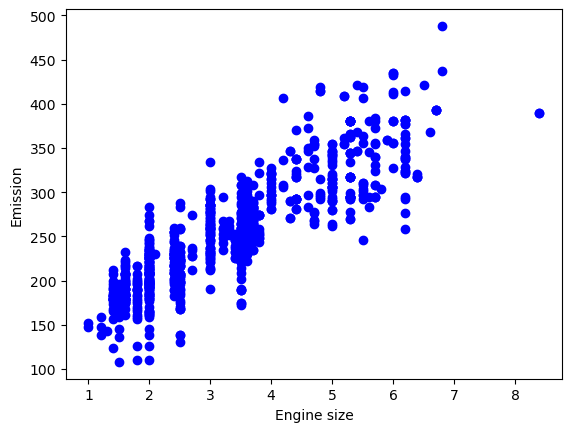

In [104]:
plt.scatter(x_train.ENGINESIZE, y_train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Modeling

In [110]:
from sklearn import linear_model
import numpy as np
model_engine_size = linear_model.LinearRegression()
xt = np.asanyarray(x_train)
yt =  np.asanyarray(y_train)
print(xt.shape)

model_engine_size.fit(xt, yt)
print ('Coefficients: ', model_engine_size.coef_)
print ('Intercept: ',model_engine_size.intercept_)

(853, 1)
Coefficients:  [[38.63099126]]
Intercept:  [126.3436428]


### Plot output 

Text(0.5, 1.0, 'Output on Train Data')

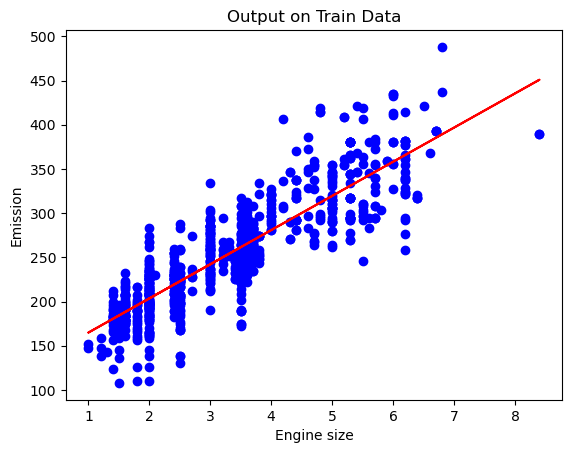

In [107]:
plt.scatter(x_train.ENGINESIZE, y_train.CO2EMISSIONS,  color='blue')
plt.plot(xt, model_engine_size.coef_[0][0]*xt + model_engine_size.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Output on Train Data")

## Evaluation

In [108]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(x_test[['ENGINESIZE']])
test_y = np.asanyarray(y_test[['CO2EMISSIONS']])
prediction_y = model_engine_size.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , prediction_y) )

Mean absolute error: 22.87
Residual sum of squares (MSE): 901.08
R2-score: 0.79


Text(0.5, 1.0, 'Output on Test Data')

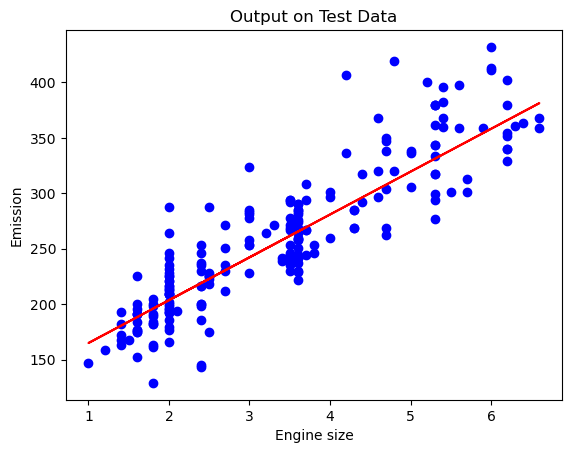

In [109]:
#plot test Data 
xtest = np.asanyarray(x_test[['ENGINESIZE']])

plt.scatter(x_test.ENGINESIZE, y_test.CO2EMISSIONS,  color='blue')
plt.plot(xtest, model_engine_size.coef_[0][0]*xtest + model_engine_size.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Output on Test Data")